# DAT210x - Programming with Python for DS

## Module6- Lab1

In [1]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
#from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
import matplotlib
import matplotlib.pyplot as plt

Feel free to adjust and experiment with these parameters after you have completed the lab:

In [2]:
C = 1
kernel = 'linear'

In [3]:
# TODO: Change to 200000 once you get to Question#2
iterations = 5000

# You can set this to false if you want to draw the full square matrix:
FAST_DRAW = True

### Convenience Functions

In [4]:
def drawPlots(model, X_train, X_test, y_train, y_test, wintitle='Figure 1'):
    # You can use this to break any higher-dimensional space down,
    # And view cross sections of it.

    # If this line throws an error, use plt.style.use('ggplot') instead
    plt.style.use('ggplot') # Look Pretty

    padding = 3
    resolution = 0.5
    max_2d_score = 0

    y_colors = ['#ff0000', '#00ff00', '#0000ff']
    my_cmap  = matplotlib.colors.ListedColormap(['#ffaaaa', '#aaffaa', '#aaaaff'])
    colors   = [y_colors[i] for i in y_train]
    num_columns = len(X_train.columns)

    fig = plt.figure()
    fig.canvas.set_window_title(wintitle)
    fig.set_tight_layout(True)
    
    cnt = 0
    for col in range(num_columns):
        for row in range(num_columns):
            
            # Easy out
            if FAST_DRAW and col > row:
                cnt += 1
                continue

            ax = plt.subplot(num_columns, num_columns, cnt + 1)
            plt.xticks(())
            plt.yticks(())

            # Intersection:
            if col == row:
                plt.text(0.5, 0.5, X_train.columns[row], verticalalignment='center', horizontalalignment='center', fontsize=12)
                cnt += 1
                continue


            # Only select two features to display, then train the model
            X_train_bag = X_train.iloc[:, [row,col]]
            X_test_bag = X_test.iloc[:, [row,col]]
            model.fit(X_train_bag, y_train)

            # Create a mesh to plot in
            x_min, x_max = X_train_bag.iloc[:, 0].min() - padding, X_train_bag.iloc[:, 0].max() + padding
            y_min, y_max = X_train_bag.iloc[:, 1].min() - padding, X_train_bag.iloc[:, 1].max() + padding
            xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                                 np.arange(y_min, y_max, resolution))

            # Plot Boundaries
            plt.xlim(xx.min(), xx.max())
            plt.ylim(yy.min(), yy.max())

            # Prepare the contour
            Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            plt.contourf(xx, yy, Z, cmap=my_cmap, alpha=0.8)
            plt.scatter(X_train_bag.iloc[:, 0], X_train_bag.iloc[:, 1], c=colors, alpha=0.5)


            score = round(model.score(X_test_bag, y_test) * 100, 3)
            plt.text(0.5, 0, "Score: {0}".format(score), transform = ax.transAxes, horizontalalignment='center', fontsize=8)
            max_2d_score = score if score > max_2d_score else max_2d_score

            cnt += 1

    print("Max 2D Score: ", max_2d_score)

In [5]:
def draw2Plots(model1, model2, d_train, d_test, l_train, l_test, title):
    """ Function to break any higher-dimensional space down and view cross
    sections of it."""
    plt.style.use('ggplot')
    # Parameters:
    padding = 1
    resolution = 10
    max_2d_score = 0
    n = d_train.shape[1]
    fig, axes = plt.subplots(n, n)
    fig.canvas.set_window_title(title)
    fig.set_tight_layout(True)
    plt.setp(axes, xticks=(), yticks=())
    for row, col in [(a, b) for a in range(n) for b in range(n)]:
        # Intersection:
        if col == row:
            axes[row, col].text(0.5, 0.5, d_train.columns[row],
                                verticalalignment='center',
                                horizontalalignment='center',
                                fontsize=12)
            continue
        # Select two features to display:
        d_train_bag = d_train.iloc[:, [row, col]]
        d_test_bag = d_test.iloc[:, [row, col]]
        # Create a mesh to plot in:
        x_max, y_max = d_train_bag.max() + padding
        x_min, y_min = d_train_bag.min() - padding
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, resolution),
                             np.linspace(y_min, y_max, resolution))
        axes[row, col].set_xlim(x_min, x_max)
        axes[row, col].set_ylim(y_min, y_max)
        # Choose model:
        if row < col:
            model = model1
            colors = 'viridis'
        else:
            model = model2
            colors = 'plasma'
        model.fit(d_train_bag, l_train)
        pred = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
        axes[row, col].contourf(xx, yy, pred, cmap=colors, alpha=.5)
        axes[row, col].scatter(d_train_bag.iloc[:, 0],
                               d_train_bag.iloc[:, 1],
                               c=l_train, cmap=colors, alpha=.8)
        score = round(model.score(d_test_bag, l_test) * 100, 3)
        axes[row, col].text(0.5, 0, f'Score: {score}',
                            transform=axes[row, col].transAxes,
                            horizontalalignment='center',
                            fontsize=8)
        max_2d_score = score if score > max_2d_score else max_2d_score

  


In [6]:
def benchmark(model, title):
    print(f"\n{title} Results")
    s = time.time()
    for i in range(iterations):
        # Train the classifier on the training data:
        a=model.fit(X_train, y_train)
    print(f"{iterations} Iterations Training Time: {time.time() - s}")
    s = time.time()
    for i in range(iterations):
        # Score the classifier on the testing data:
        score = a.score(X_test, y_test)
    print(f"{iterations} Iterations Scoring Time: {time.time() - s}")
    print(f"High-Dimensionality Score: {round(score*100, 3)}")
    score = None


### The Assignment

Load up the wheat dataset into dataframe `X` and verify you did it properly. Indices shouldn't be doubled, nor should you have any headers with weird characters...

In [7]:
X = pd.read_csv('datasets/wheat.data', index_col=0)
print(X.head())

     area  perimeter  compactness  length  width  asymmetry  groove wheat_type
id                                                                            
0   15.26      14.84       0.8710   5.763  3.312      2.221   5.220       kama
1   14.88      14.57       0.8811   5.554  3.333      1.018   4.956       kama
2   14.29      14.09       0.9050   5.291  3.337      2.699   4.825       kama
3   13.84      13.94       0.8955   5.324  3.379      2.259   4.805       kama
4   16.14      14.99       0.9034   5.658  3.562      1.355   5.175       kama


In [8]:
# An easy way to show which rows have nans in them:
X[pd.isnull(X).any(axis=1)]

,area,perimeter,compactness,length,width,asymmetry,groove,wheat_type
id,,,,,,,,
7,14.11,14.10,0.8911,5.4200,3.302,2.700,NaN,canadian
35,16.12,15.00,NaN,0.9000,NaN,5.709,3.485,canadian
60,11.42,12.86,0.8683,5.0080,2.850,2.700,NaN,canadian
135,15.38,14.66,0.8990,5.4770,3.465,3.600,NaN,canadian
169,11.24,13.00,NaN,0.8359,5.090,2.715,3.521,canadian
170,11.02,13.00,NaN,0.8189,5.325,2.701,6.735,canadian
201,12.67,13.32,0.8977,4.9840,3.135,2.300,NaN,canadian


Go ahead and drop any row with a nan:

In [9]:
X.dropna(axis = 0, how = 'any', inplace = True)
X[pd.isnull(X).any(axis=1)]

,area,perimeter,compactness,length,width,asymmetry,groove,wheat_type
id,,,,,,,,


In the future, you might try setting the nan values to the mean value of that column, the mean should only be calculated for the specific class rather than across all classes, now that you have the labels.

Copy the labels out of the dataframe into variable `y`, then remove them from `X`.

Encode the labels, using the `.map()` trick we showed you in Module 5, such that `canadian:0`, `kama:1`, and `rosa:2`.

In [10]:
y = X.wheat_type
X.drop('wheat_type', axis = 1, inplace = True)
print (X.head())
y = y.map({'canadian': 0, 'kama': 1, 'rosa': 2})
print (y)

     area  perimeter  compactness  length  width  asymmetry  groove
id                                                                 
0   15.26      14.84       0.8710   5.763  3.312      2.221   5.220
1   14.88      14.57       0.8811   5.554  3.333      1.018   4.956
2   14.29      14.09       0.9050   5.291  3.337      2.699   4.825
3   13.84      13.94       0.8955   5.324  3.379      2.259   4.805
4   16.14      14.99       0.9034   5.658  3.562      1.355   5.175
id
0      1
1      1
2      1
3      1
4      1
5      1
6      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
30     1
      ..
179    0
180    0
181    0
182    0
183    0
184    0
185    0
186    0
187    0
188    0
189    0
190    0
191    0
192    0
193    0
194    0
195    0
196    0
197    0
198    0
199    0
200    0
202    0
203    0
204    0
205    0
206    0

Split your data into a `test` and `train` set. Your `test` size should be 30% with `random_state` 7. Please use variable names: `X_train`, `X_test`, `y_train`, and `y_test`:

In [11]:
#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)

Create an SVC classifier named `svc` and use a linear kernel. You already have `C` defined at the top of the lab, so just set `C=C`.

In [12]:
#from sklearn.svm import SVC
svc = SVC(C = C, kernel = kernel)

Create an KNeighbors classifier named `knn` and set the neighbor count to `5`:

In [13]:
#from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)

In [14]:
# Add in a Decision Tree Classifier, set its max_depth to 9, and random_state = 2, but do not alter any other setting:
from sklearn import tree
dtree = tree.DecisionTreeClassifier(max_depth = 9, random_state = 2)


### Fire it Up:

In [15]:
benchmark(knn, 'KNeighbors')
benchmark(svc, 'SVC')
benchmark(dtree, 'DecisionTree')


KNeighbors Results
5000 Iterations Training Time: 1.5190775394439697
5000 Iterations Scoring Time: 3.1553492546081543
High-Dimensionality Score: 83.607

SVC Results
5000 Iterations Training Time: 2.8806586265563965
5000 Iterations Scoring Time: 1.171152114868164
High-Dimensionality Score: 86.885

DecisionTree Results
5000 Iterations Training Time: 2.237912178039551
5000 Iterations Scoring Time: 0.8642978668212891
High-Dimensionality Score: 91.803


Max 2D Score:  90.164


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


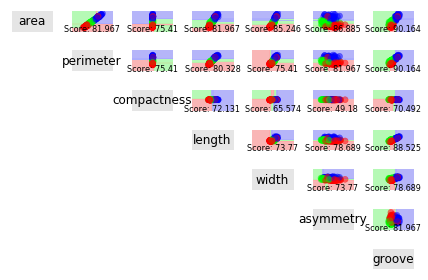

In [16]:
drawPlots(dtree,X_train, X_test, y_train, y_test,'Tree')
plt.show()

Max 2D Score:  93.443


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


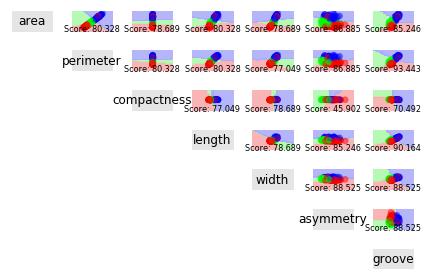

In [17]:
drawPlots(svc, X_train, X_test, y_train, y_test,'SVC')
plt.show()

Max 2D Score:  90.164


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


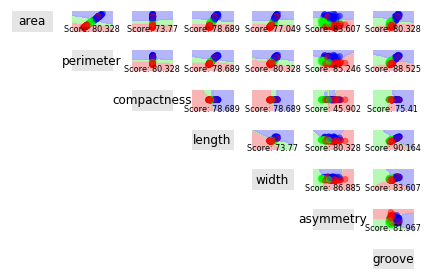

In [18]:
drawPlots(knn,X_train, X_test, y_train, y_test,'KNN')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


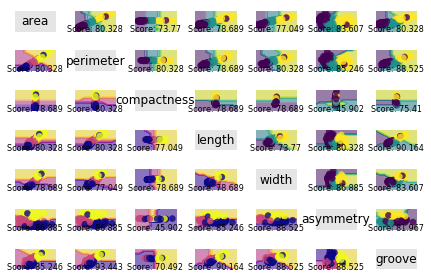

In [19]:
draw2Plots(knn, svc, X_train, X_test, y_train, y_test, 'KNeighbors Vs SVC')
plt.show()

### Bonus:

After submitting your answers, mess around with the gamma, kernel, and C values.

Decision trees are highly optimal. On this specific dataset, even with as little as two splits, they still out-do KNeighbors, and even fair well against SVC.
max_depth = 1
KNeighbors Results
5000 Iterations Training Time: 1.9534471035
5000 Iterations Scoring Time: 3.8806810379
High-Dimensionality Score: 83.607
Max 2D Score: 90.164
SVC Results
5000 Iterations Training Time: 3.85418701172
5000 Iterations Scoring Time: 1.6913061142
High-Dimensionality Score: 86.885
Max 2D Score: 93.443
DTree Results
5000 Iterations Training Time: 1.70960593224
5000 Iterations Scoring Time: 1.32432198524
High-Dimensionality Score: 68.852
Max 2D Score: 68.852